<a href="https://colab.research.google.com/github/mariiacd13/07-MBIG_js-5v351g/blob/master/_MC_06MBIG_AG1_DengAI_Predicting_Disease_Spread_Exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![texto alternativo](https://community.drivendata.org/uploads/default/original/1X/0f3a28954438c90e1935d61f3f2c23e906feb39a.jpg)

# **DengAI. Predicting Disease Spread - Exploración**

---

Autor: Maria Cabrera Dengra

Fecha: 16/04/2020  -  26/04/2020

---


#  El Objetivo de la práctica: 

Utilizar técnicas de aprendizaje no supervisado para realizar una exploración preliminar de los datos y extraer conclusiones. 



Vamos a utilizar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

# 1. Instalación de las librerias necesarias. 

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas. 


In [0]:
# Carga de dataset
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

from scipy import cluster
import sklearn.neighbors
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D

from sklearn import preprocessing 
import sklearn.neighbors
from scipy import cluster



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Carga de Datos

Para esta práctica vamos a trabajar con el dataset dengue_features_train.csv. Es por ello que en este apartado subiremo el dataframe para poder trabajar con él. 

1.   Insertamos la funcion para la carga de datos desde google coolab
2.   Subimos el fichero con extension: dengue_features_train.csv



In [0]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [0]:
train = upload_files(['city', 'weekofyear', 'year'])
train.head()

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


week_start_date  ...  station_precip_mm
city weekofyear year                  ...                   
sj   18         1990      1990-04-30  ...               16.0
     19         1990      1990-05-07  ...                8.6
     20         1990      1990-05-14  ...               41.4
     21         1990      1990-05-21  ...                4.0
     22         1990      1990-05-28  ...                5.8

[5 rows x 21 columns]

In [0]:
train.shape

(1456, 21)

Con esta vista rápida podemos conocer los parámetros que vienen en el datatset. 


*   Observamos que encontramos datos para cada ciudad, según la semana del año y el año. **Será nuestro código distintivo**. 
*   El resto de la información osvervamos valres de ndvi ( indice de vigor vegetativo) valores de precicpitacion, temperatura, humedad, etc. 
*   Una vez tenemos todo el dataframe podriamos analizar que caracteristias necesitamos y cuales deberiamos excluir. En este caso el campo de **week_start_date" es un dato repetido y seria una variable a poder ser eliminada** 
*   Necesitamos conocer la **extensión total del fichero**. Para ello lo haremos ocn el .shape. En este caso este dataframe contiene 1456 filas de datos y consta con 21 columnas. 


# 3. Preproceso



En el apartado de preproceso de los datos deslosaremos las singuientes acciones que se ejecuten sobre el conjunto de los datos: 



*   Trasnformaciones
*   Detección de campos vacios (**isnull)**
*   Rellenamos datos vacíos con la logica seleccionada (** ffill** -> rellena con el valor previo)
*   Normalizaciones
*   Elimnación de variables
*   Elemento de lista

Gracias  la carga de datos, se detectó rapidamente infomración redundante en el dataset, es por ello, que procedemos a **eliminar la variable "week_start_date**


In [0]:
train.drop("week_start_date", axis = 1, inplace = True)
train.head()


ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
city weekofyear year                      ...                                       
sj   18         1990  0.122600  0.103725  ...                20.0               16.0
     19         1990  0.169900  0.142175  ...                22.2                8.6
     20         1990  0.032250  0.172967  ...                22.8               41.4
     21         1990  0.128633  0.245067  ...                23.3                4.0
     22         1990  0.196200  0.262200  ...                23.9                5.8

[5 rows x 20 columns]

Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

In [0]:
pd.isnull(train).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo)

In [0]:
# ffill: propagate last valid observation forward to next valid backfill
train.fillna(method='ffill', inplace=True)
pd.isnull(train).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

**Transformaciones previas**

Una de las transformaciones mas improtantes es llevar todos los datos a la misma escala de trabajo. Nosotros trabajaremos en [0,1]

La función que se va a llevar a cabo es la vista en clase MinMaxScaler, que transformará como dato minimo= 0 y máximo = 1. 

In [0]:

min_max_scaler = preprocessing.MinMaxScaler()
datanorm = min_max_scaler.fit_transform(train)


# 4. Estudio de correlación de variables

Esto se realiza con el fin de obtener un mejor rendimiento. Necesitamos identificar si existe variables que son redundantes y **obtener un mejor conocimiento de nuestro dataset**.

Empezaremos con un mapa de calor que nos indica la correlación entre las variables de estudio. Las que tienen un valor 1, es q son ídenticas y -1 serán totalmente inversas. Los consideraremos datos redundantes. 

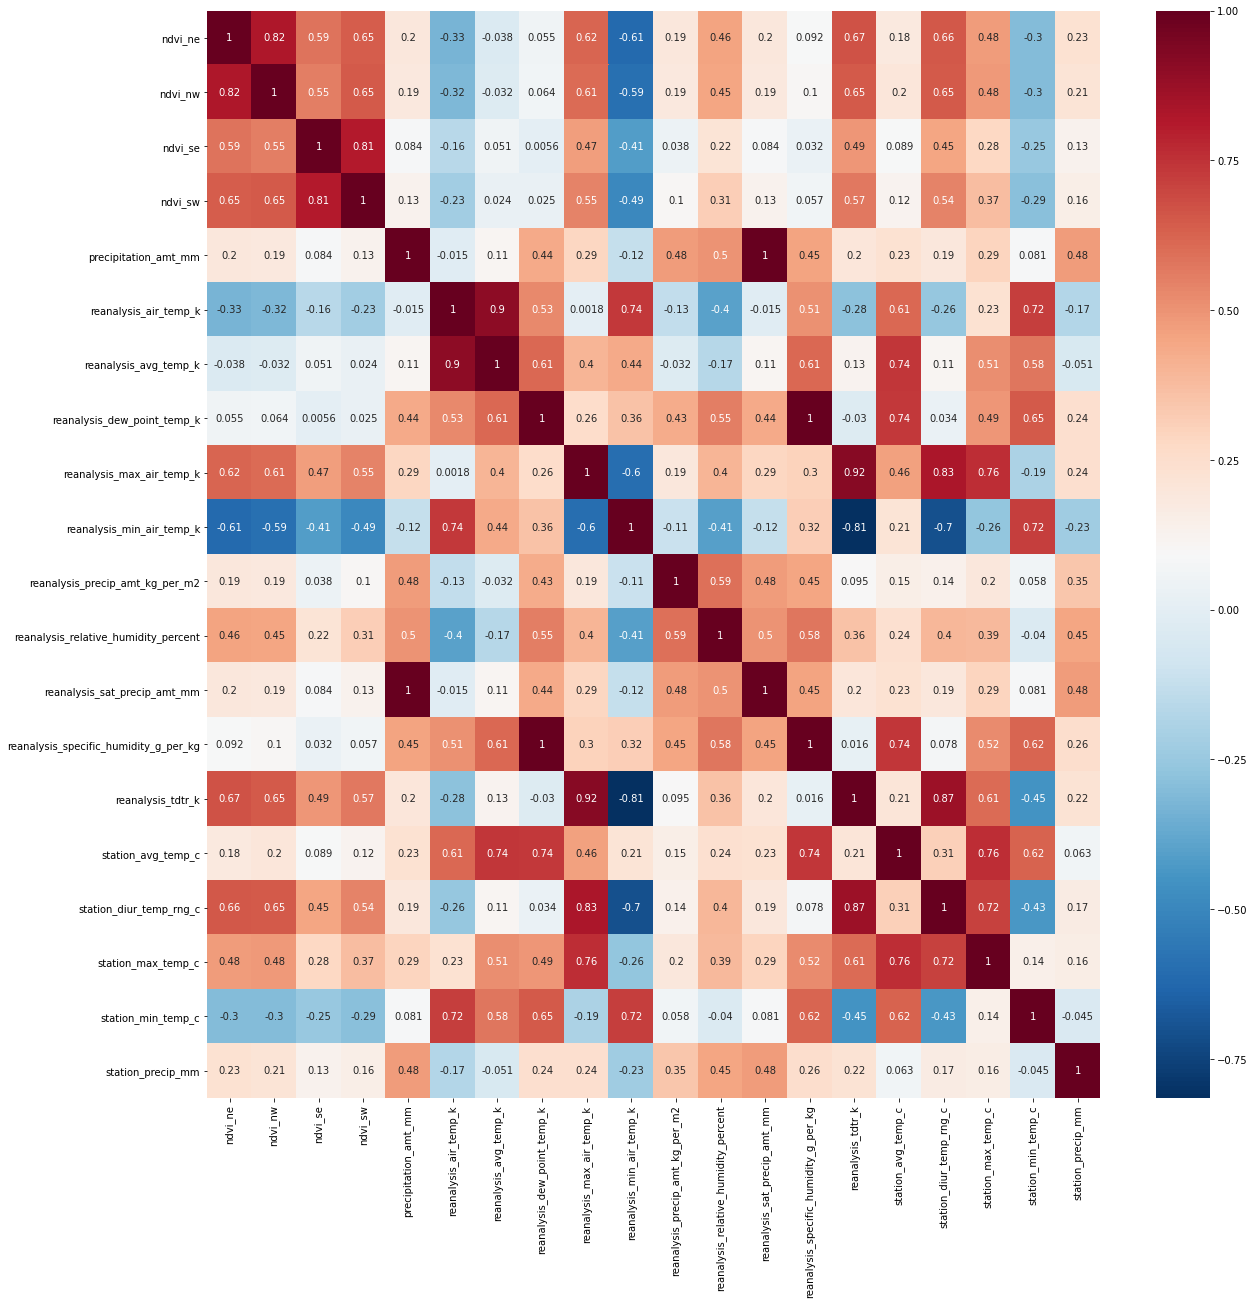

In [0]:
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdBu_r")


**¿Qué nos muestra este mapa de calor?**



1.   Con este mapa de correlación detectamos algunas variables que nos muestran la misma información. Son aquellas que su correlación tiene el valor-
            *   precipitation_amt_mm	= reanalysis_sat_precip_amt_mm
            *   reanalysis_dew_point_temp_k = reanalysis_specific_humidity_g_per_kg


2.   Fuerte correlacion entre variables de NDVI. Es comprensible ya que selen de la misma fuente de calculo. 


3.   Baja correlacion de datos de satelite y estación climatologica. También puede ser compresible por ser dos fuentes de datos diferente. 

# 4.1 Análisis de componentes principales. 



El análisis de componenes principales (PCA) es una técnica utilizada para **reducir la dimensionalidad del conjunto de datos a estudiar**. Este algoritmo estudia los datos y  las ordena por importancia. 

PCA comporta el cálculo de la descomposición en autovalores de la matriz de covarianza, normalmente tras centrar los datos en la media de cada atributo. Para ello utilizaremos el procedimiento StandardScaler de scikitlearn, escogeremos el dataset ya normalizado " DATANORM"

En esta primera iteración, vamos a mantener todo el dataset. Pasa poder analizar su comportamiento.  

Una de las ventajas del PCA para reducir la dimensionalidad de un grupo de datos, es que retiene aquellas características del conjunto de datos que contribuyen más a su varianza, manteniendo un orden de bajo nivel de los componentes principales e ignorando los de alto nivel. 

El objetivo es que esos componentes de bajo orden a veces contienen el aspecto “más importante” de esa información 


In [0]:
for e in range(1,10):
    estimator = PCA (n_components = e)
    X_pca = estimator.fit_transform(datanorm)
    print("PCA con %s variable(s): " % str(e) + str(round(estimator.explained_variance_ratio_.sum()*100,2)) +"% de varianza")

PCA con 1 variable(s): 42.67% de varianza
PCA con 2 variable(s): 70.75% de varianza
PCA con 3 variable(s): 81.98% de varianza
PCA con 4 variable(s): 87.09% de varianza
PCA con 5 variable(s): 90.54% de varianza
PCA con 6 variable(s): 92.71% de varianza
PCA con 7 variable(s): 94.37% de varianza
PCA con 8 variable(s): 95.71% de varianza
PCA con 9 variable(s): 96.69% de varianza


Observamos las diferentes variables con su % de varianza. Vemos que podriamos escoger entre 4 o 5 variables, es ahí donde podriamos tener representado el 90% de su totalidad. Escogeremos 4 y así nos aseguramos que está describiendo la totalidad del dataset. 
Por lo tento escogeremos:  **cuatro componentes principales**

In [0]:
from sklearn.decomposition import PCA
estimator = PCA (n_components = 4)
X_pca = estimator.fit_transform(datanorm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [0.42673065 0.2807942  0.1123039  0.05108867]


El variance Ratio siempre es decreciente, si jugaramos a introducir mas componenes princiaples veriamos que introduciremos poca variabilidad. 


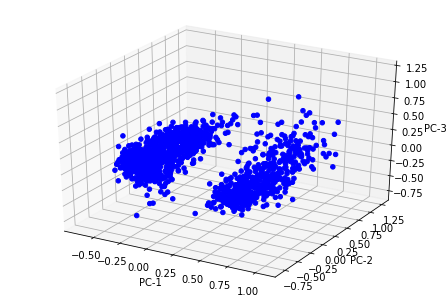

In [0]:
fig = matplotlib.pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2],c="blue", alpha=1)

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')

matplotlib.pyplot.show()


**¿Que nos porporciona el gráfico de PCA?**

Se ha querido representar en 3 dimesiones para poder visualizar en mas detalle el restudado obtenidos. 

Gracias a esta visualización vemos que tenemos dos naturaleza de datos diferente. Esto suponemos que es debido a las ciudades. Por tanto se aconseja **dividir el dataset** para poder trabajar correctamente. 


# 4.2 Clustering Jerárquico

Los algoritmos de clustering jerárquico se distinguen por generar como resultado una estructura de grupos organizada en forma de árbol jerárquico. Este árbol se denomina **dendograma**. 

Nos ayudará a observar las relaciones de similitud entre las variables. Aquellas grupos de variables que sean similares entre ellas pueden ser resumidas escogiendo una de ellas y de esa forma r**educiríamos la dimensionalidad del conjunto de datos**.


En primer lugar, dibujaremos una matriz de distancia. Se escogerá la distancia euclidea.  Esto nos ayudará a conocer las similitudes entre nuestros datos, que darán posteriormente a su clusterizacion. 

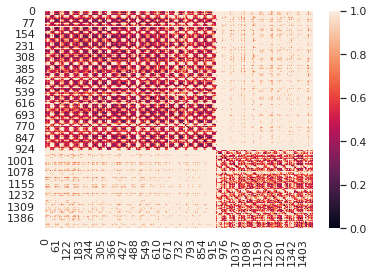

In [0]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)

import seaborn as sns; sns.set()
ax = sns.heatmap(matsim,vmin=0, vmax=1)

**¿Que nos ofrece está matriz de distancias?**

Vemos que existen dos set de datos claramente diferenciados. Esto podría tratarse de la ubicación. En nuestro set de datos tenemos dos ciudades de estudio. 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


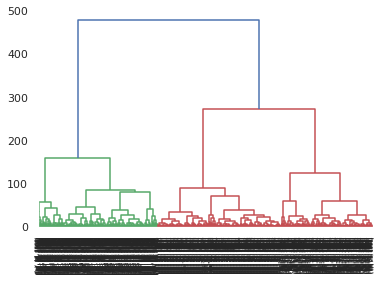

<Figure size 432x288 with 0 Axes>

In [0]:
# 3.2. Building the Dendrogram	
clusters = cluster.hierarchy.linkage(matsim, method = 'ward')
cluster.hierarchy.dendrogram(clusters, labels = train.index)

# 3.2.1 Visualization
f = plt.figure()
plt.show()


**¿Qué informacion nos aporta el siguiente dendograma?**

Decir primeramente que se ha trabajado con el metodo warm, que similiar al "average linkage". Es el más interpretable y donde se puede ubicar con mas secillez los diferentes grupos. 

A analizandolo, **cortaria por 170**. Y aque tras este corte s**e quedan 3 clusters** de datos de tamaño bastante similar y compnesado. 



In [0]:
cut = 170
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([3, 3, 2, ..., 1, 1, 1], dtype=int32)

**¿Como sabemos si nuestra interpretación es correcta?**

Para ello trabajaremos con el **coeficiente de silhouette**, es un indicador de calidad del resultadod el clustering. 

El coeficiente suele estar entre 0 y 1. Siendo 1 el mejor indicador. Se prueba con las diferentes escenarios, valorando los raultados obtenidos, el mayor valor de silhoutte nos indicará cual podria ser la mejor eleccion. 

In [0]:
# tratamos el cluster -1 como cluster de outliers
from sklearn import metrics
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, labels))

Estimated number of clusters: 3
Silhouette Coefficient: 0.356


Y podríamos comenzar con la caracterízación de los grupos, en primer lugar visualizandolos utilizando la proyección PCA

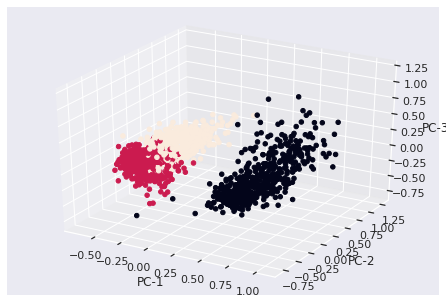

In [0]:
fig = matplotlib.pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2],c=labels, alpha=1)

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')

matplotlib.pyplot.show()

**¿Nos ayuda a interpretar el gráfico caraterizando por grupos?**

Gracias a este gráfico vemos los 3 clusters trabajados. Uno es complicado de trabajar por el tono de color. Pero si que vemos que el grupo del negro es donde vemos una mayor dispersion. Del mismo modo con el color rosita, vemos que es un cluster donde encontramos datos aislados. SIendo el color rojo el mas compacto. 

**Análisis con estadisticos básicos:**
En la gráfica siguiente vemos cada variable según su media.  En este caso nos aporta poca información porque vemos que están bastante distribuidos. 


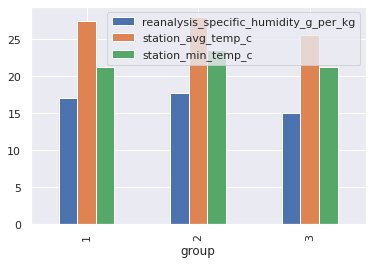

In [0]:
train['group'] = labels


res = train[['reanalysis_specific_humidity_g_per_kg', 
                 'station_avg_temp_c', 'station_min_temp_c','group']].groupby(('group')).mean()

res.plot(kind='bar', legend=True)



Con esta visualización nos permite ver cada uno de los grupos que datos contiene. 

In [0]:
train[train['group'] == 3]

ndvi_ne   ndvi_nw  ...  station_precip_mm  group
city weekofyear year                      ...                          
sj   18         1990  0.122600  0.103725  ...               16.0      3
     19         1990  0.169900  0.142175  ...                8.6      3
     47         1990  0.272200  0.330350  ...                9.6      3
     48         1990  0.136767  0.216525  ...               26.7      3
     49         1990  0.109800  0.088600  ...               69.0      3
...                        ...       ...  ...                ...    ...
     13         2008  0.077850 -0.039900  ...                1.8      3
     14         2008 -0.038000 -0.016833  ...                0.5      3
     15         2008 -0.155200 -0.052750  ...               30.7      3
     16         2008  0.001800 -0.052750  ...               11.2      3
     17         2008 -0.037000 -0.010367  ...                0.3      3

[396 rows x 21 columns]

# 4.3 Algoritmos basados en Densidad ( DBSCAN) 

**DBSCAN**



*   Nos ayudará a detectar regiones densas de puntos separadas de otras regiones poco densas. 
*   Útil cuando los cluster tienen formas irregulares. Por lo que nos ayuda a **detectar outliers.**



El proposito en este ejercicio es de identificar ouliter, aislando aquellas características que son diferentes a los demás y que nos pueden ayudar a distinguir a los diferentes elementos a los que representan.

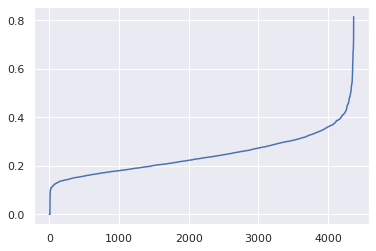

In [0]:
minPts=3  #Nos ayuda establecer el epsilon
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(datanorm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(datanorm):
    for j in range(len(datanorm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 6000, 1000))
ax.set_yticks(np.arange(0, 5, 0.2))

plt.plot(seq)


plt.show()

**¿Como establecemos el EPS y los intervalos?**

Analizando el gráfico, vemos que el punto de inflexión va de 0.2 a 0.5  con intervalos de 0.1



In [0]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.2, 0.5, 0.05):
  db = DBSCAN(eps, min_samples=minPts).fit(datanorm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print (eps, n_clusters_)
  
#labels

0.2 13
0.25 18
0.3 6
0.35 3
0.39999999999999997 2
0.44999999999999996 2


Visualizando los diferentes datos, establecemos nuestra epsilon. Eps=0.35. Detectando 4 grupos de datos outliers. 

Con la siguiente ejecución los categorizamos en el datanorm, que es donde tenemos los datos del train normalizados. 

Los visualizaremos y posteriomente los extraremos en formato tabla para poder analizarlos. 

In [0]:
db = DBSCAN(eps=0.35, min_samples=minPts).fit(datanorm)
labels = db.labels_
labels

array([ 0,  0,  0, ..., -1,  1,  1])

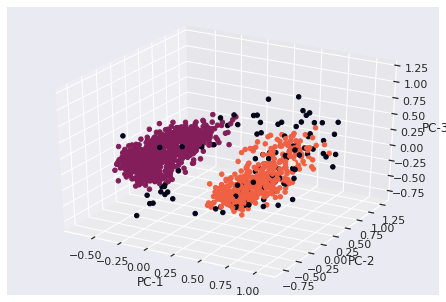

In [0]:
fig = matplotlib.pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2],c=labels, alpha=1)

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')

matplotlib.pyplot.show()

**Visualizamos el nº de outliers (color negro) que estamos hablando de 101** elementos de los 1400 del dataset. 

In [0]:
train['dbscan_group'] = labels

train[train['dbscan_group'] == -1]

ndvi_ne   ndvi_nw  ...  group  dbscan_group
city weekofyear year                      ...                     
sj   42         1990  0.171150  0.070200  ...      2            -1
     21         1992  0.102400  0.068600  ...      2            -1
     22         1992  0.121500  0.068600  ...      2            -1
     38         1996  0.104300  0.028450  ...      2            -1
     3          1998 -0.016150 -0.008225  ...      2            -1
...                        ...       ...  ...    ...           ...
iq   36         2009  0.508357  0.454429  ...      1            -1
     8          2010  0.303657  0.260057  ...      1            -1
     10         2010  0.311729  0.292686  ...      1            -1
     12         2010  0.266286  0.301233  ...      1            -1
     23         2010  0.247057  0.146057  ...      1            -1

[101 rows x 22 columns]

# 5. Conclusiones primera exploración



1.   Tras los diferentes estudios observamos que será necesario dividir el dataset por Ciudad, tanto en el cluster jerarquico, PCA , se notan dos naturalezas difernte de datos. 
2.  Por lo tanto, se dividirá y se realizarán los siguientes pasos para evaluar esta teoria. 



# 6. Separación del dataSet por cuidades y análisis de variables. 


In [0]:
sj = train.loc['sj']
iq = train.loc['iq']
sj.head()

,,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,group,dbscan_group
weekofyear,year,,,,,,,,,,,,,,,,,,,,,,
18,1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,3,0
19,1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,3,0
20,1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,2,0
21,1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,2,0
22,1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,2,0


Comprobamos el tamaño los diferentes DATASETS: 

San Juan tiene 936 entradas de datos y Iquitos tiene 520

In [0]:
sj.shape

(936, 22)

In [0]:
iq.shape

(520, 22)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sj_norm= scaler.fit_transform(sj)
iq_norm= scaler.fit_transform(iq)

**Mapa de calor de San Juan**

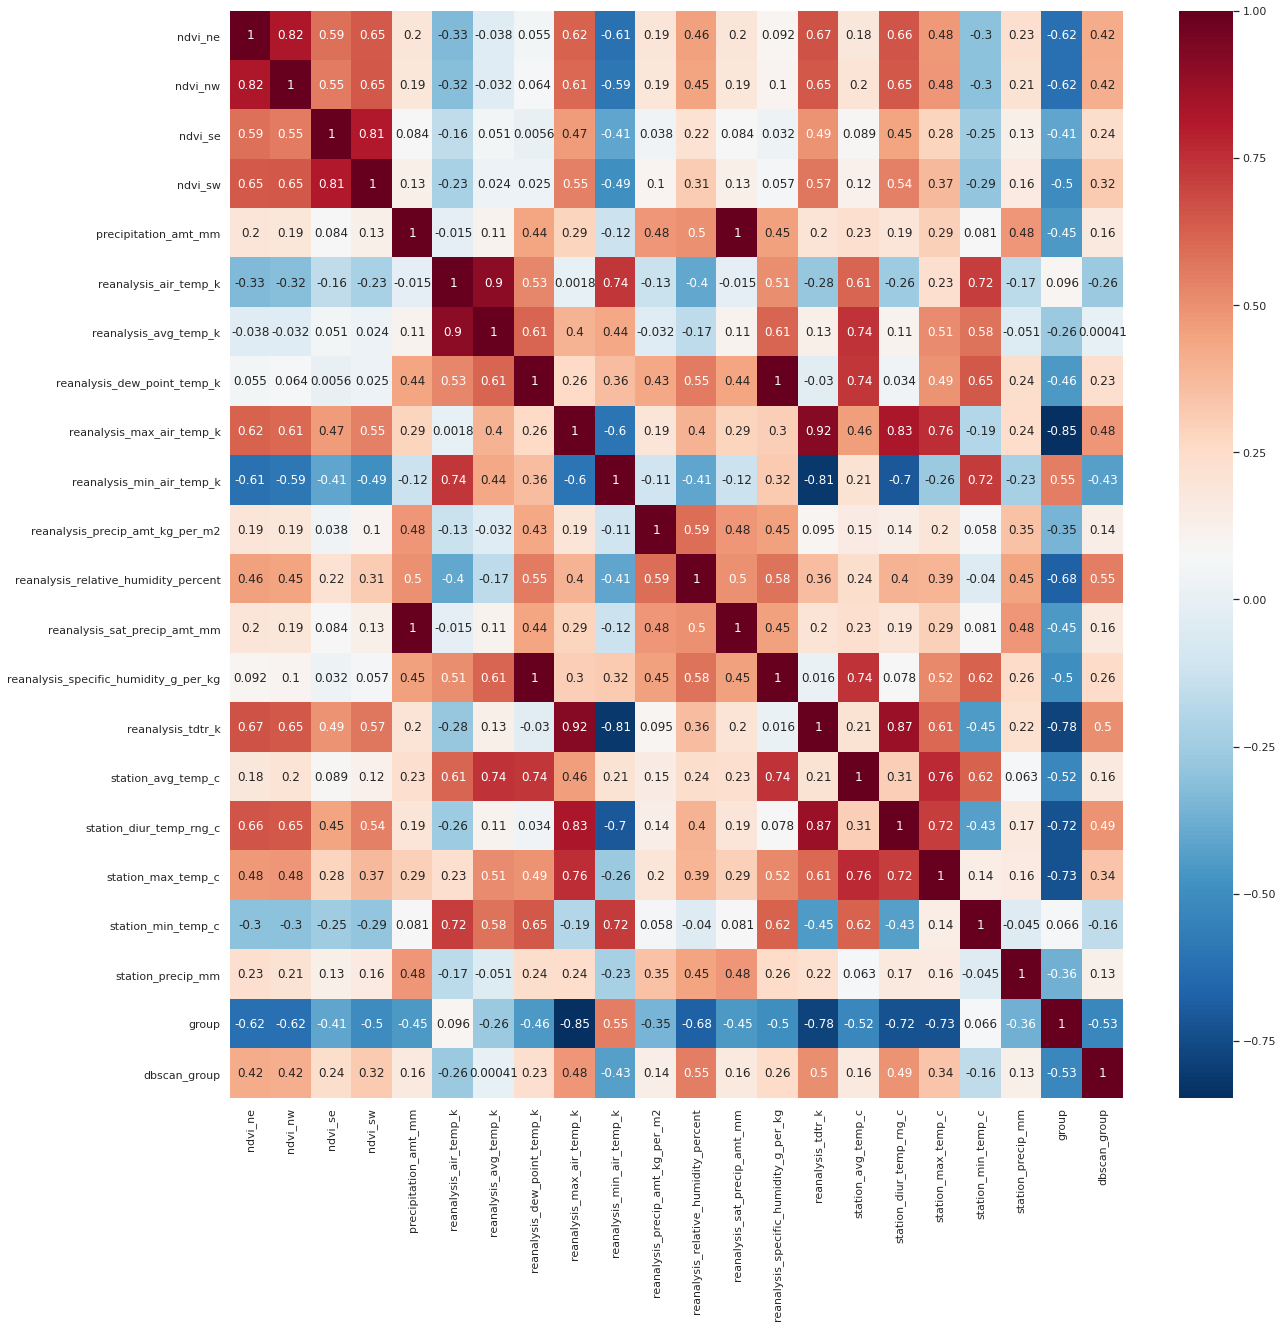

In [0]:
#get correlations of each features in dataset
corrmat = sj.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdBu_r")

1.  Del mismo modo que vimos en la primera iteración, podemos eliminar algunas variables redundantes: 

            *   precipitation_amt_mm	= reanalysis_sat_precip_amt_mm
            *   reanalysis_dew_point_temp_k = reanalysis_specific_humidity_g_per_kg



**Mapa de calor Iquitos**

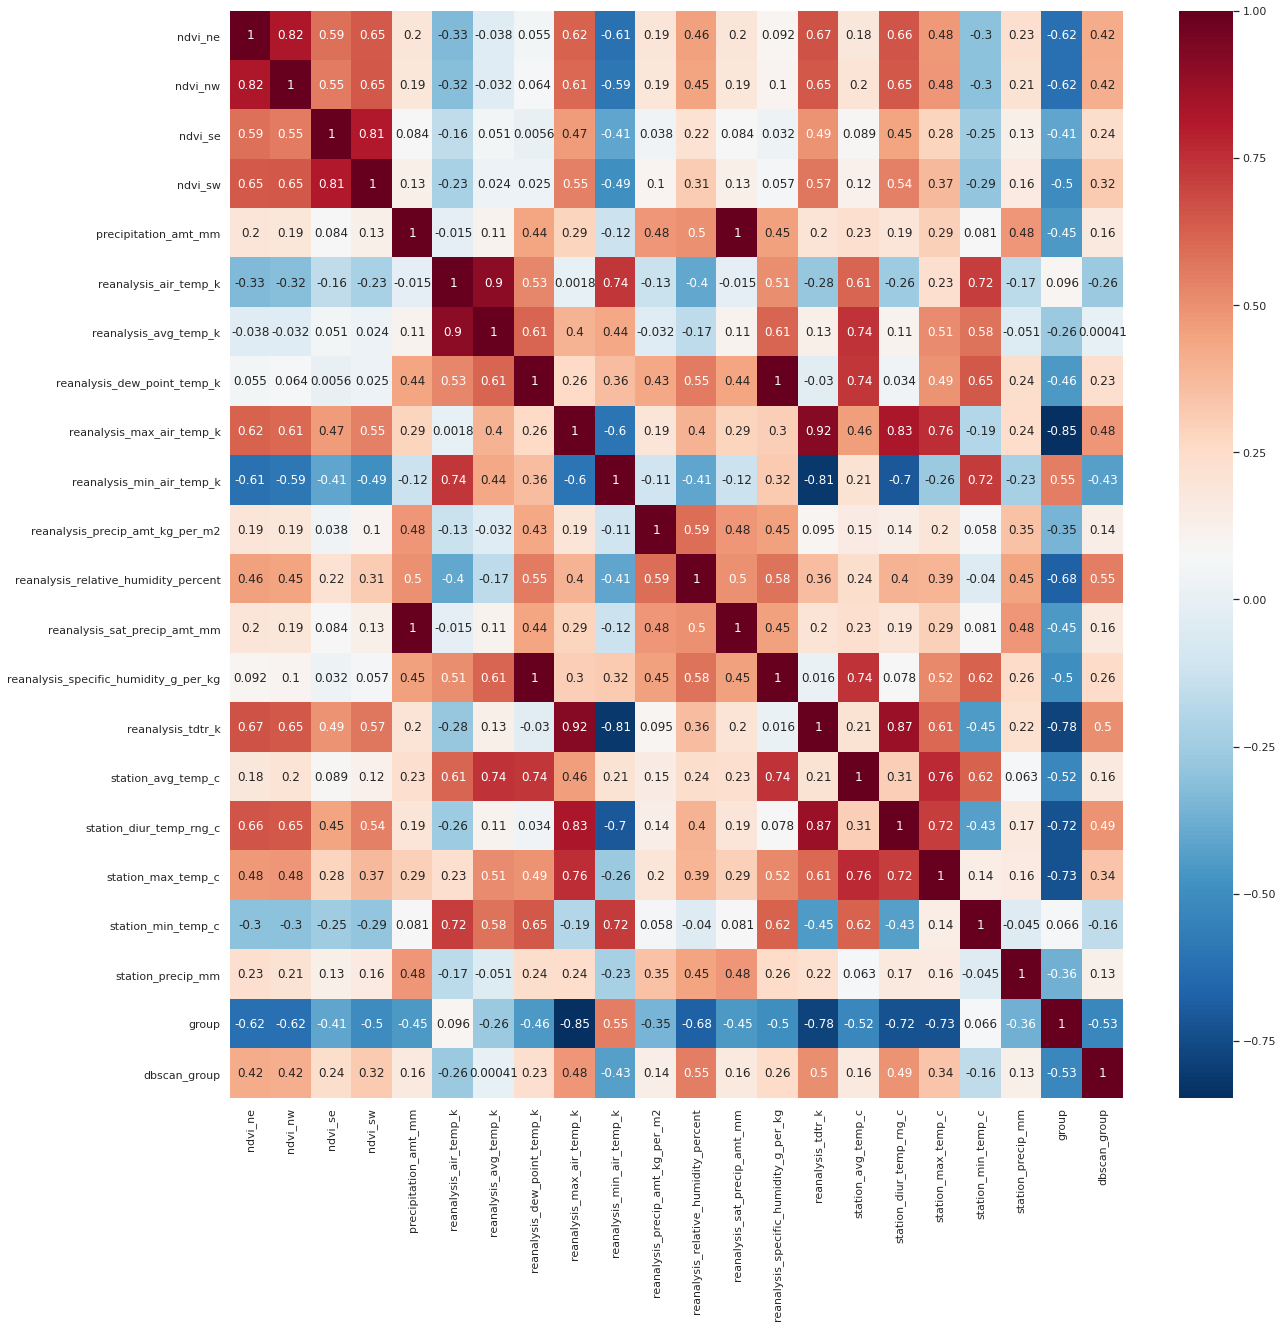

In [0]:
#get correlations of each features in dataset
corrmat = iq.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdBu_r")